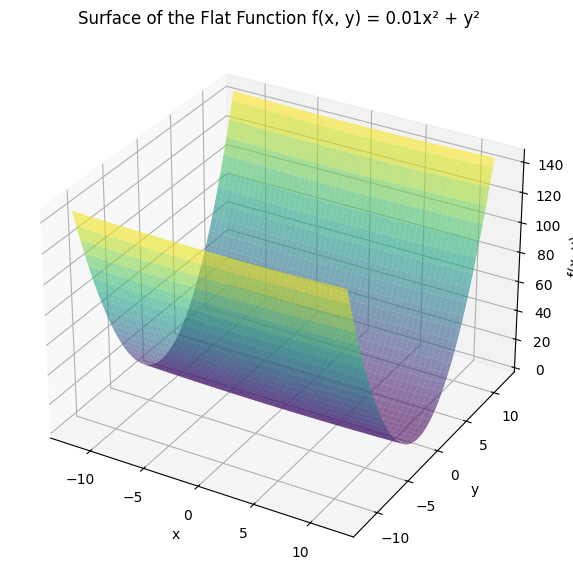

In [2]:
import torch

# 1. Define a "Flat" Function: f(x, y) = 0.01x^2 + y^2
# The x-direction is 100x flatter than the y-direction!
def flat_function(params):
    return 0.01 * params[0]**2 + params[1]**2

# Plot the function surface
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-12, 12, 100)
Y = np.linspace(-12, 12, 100)
X, Y = np.meshgrid(X, Y)
Z = 0.01 * X**2 + Y**2
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.set_title('Surface of the Flat Function f(x, y) = 0.01x² + y²')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

In [9]:
# Start far away at (10, 10)
start = [10.0, 10.0]

# --- Runner 1: Standard SGD ---
p_sgd = torch.tensor(start, requires_grad=True)
opt_sgd = torch.optim.SGD([p_sgd], lr=0.1)

# --- Runner 2: Adam ---
p_adam = torch.tensor(start, requires_grad=True)
opt_adam = torch.optim.Adam([p_adam], lr=0.1)

print(f"{'Step':<6} | {'SGD (x, y)':<20} | {'Adam (x, y)':<20}")
print("-" * 50)

for i in range(1, 11):
    # Update SGD
    opt_sgd.zero_grad()
    loss_sgd = flat_function(p_sgd)
    loss_sgd.backward()
    opt_sgd.step()
    
    # Update Adam
    opt_adam.zero_grad()
    loss_adam = flat_function(p_adam)
    loss_adam.backward()
    opt_adam.step()
    
    print(f"{i:<6} | ({p_sgd[0]:.2f}, {p_sgd[1]:.2f}) | ({p_adam[0]:.2f}, {p_adam[1]:.2f})")

Step   | SGD (x, y)           | Adam (x, y)         
--------------------------------------------------
1      | (9.98, 8.00) | (9.90, 9.90)
2      | (9.96, 6.40) | (9.80, 9.80)
3      | (9.94, 5.12) | (9.70, 9.70)
4      | (9.92, 4.10) | (9.60, 9.60)
5      | (9.90, 3.28) | (9.50, 9.50)
6      | (9.88, 2.62) | (9.40, 9.40)
7      | (9.86, 2.10) | (9.30, 9.30)
8      | (9.84, 1.68) | (9.20, 9.20)
9      | (9.82, 1.34) | (9.10, 9.10)
10     | (9.80, 1.07) | (9.00, 9.00)


/var/folders/tg/9kqvmvx53qd8zhrspxc_pgf80000gn/T/ipykernel_67283/3318482723.py:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:256.)
  return torch.tensor(path)


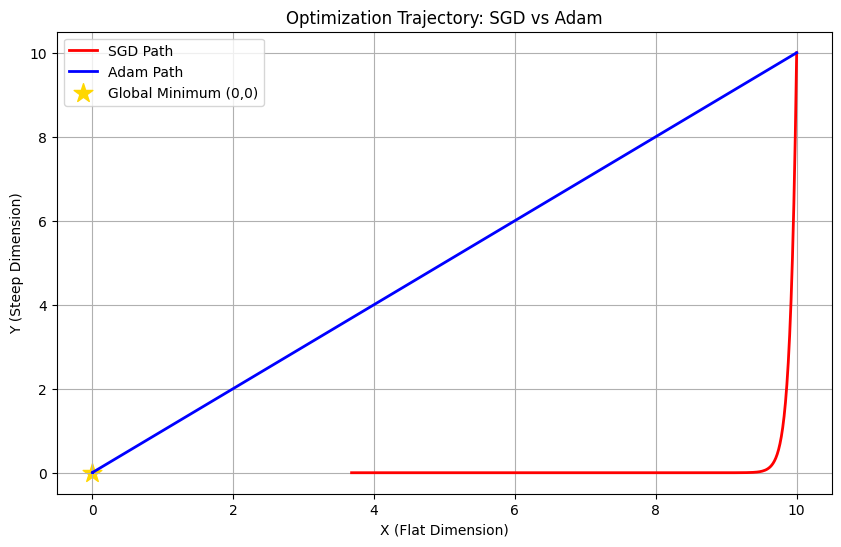

In [10]:
import torch
import matplotlib.pyplot as plt

def loss_func(params):
    return 0.01 * params[0]**2 + params[1]**2

def run_optimizer(opt_class, name, steps=500, lr=0.1):
    params = torch.tensor([10.0, 10.0], requires_grad=True)
    optimizer = opt_class([params], lr=lr)
    path = []
    
    for _ in range(steps):
        path.append(params.detach().clone().numpy())
        optimizer.zero_grad()
        loss = loss_func(params)
        loss.backward()
        optimizer.step()
    return torch.tensor(path)

# Run both
sgd_path = run_optimizer(torch.optim.SGD, "SGD")
adam_path = run_optimizer(torch.optim.Adam, "Adam")

# Visualize the trajectories
plt.figure(figsize=(10, 6))
plt.plot(sgd_path[:, 0], sgd_path[:, 1], label='SGD Path', color='red', lw=2)
plt.plot(adam_path[:, 0], adam_path[:, 1], label='Adam Path', color='blue', lw=2)
plt.scatter(0, 0, marker='*', color='gold', s=200, label='Global Minimum (0,0)')
plt.xlabel('X (Flat Dimension)')
plt.ylabel('Y (Steep Dimension)')
plt.title('Optimization Trajectory: SGD vs Adam')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
sgd_path


tensor([[1.0000e+01, 1.0000e+01],
        [9.9800e+00, 8.0000e+00],
        [9.9600e+00, 6.4000e+00],
        [9.9401e+00, 5.1200e+00],
        [9.9202e+00, 4.0960e+00],
        [9.9004e+00, 3.2768e+00],
        [9.8806e+00, 2.6214e+00],
        [9.8608e+00, 2.0972e+00],
        [9.8411e+00, 1.6777e+00],
        [9.8214e+00, 1.3422e+00],
        [9.8018e+00, 1.0737e+00],
        [9.7822e+00, 8.5899e-01],
        [9.7626e+00, 6.8719e-01],
        [9.7431e+00, 5.4976e-01],
        [9.7236e+00, 4.3980e-01],
        [9.7042e+00, 3.5184e-01],
        [9.6848e+00, 2.8147e-01],
        [9.6654e+00, 2.2518e-01],
        [9.6461e+00, 1.8014e-01],
        [9.6268e+00, 1.4412e-01],
        [9.6075e+00, 1.1529e-01],
        [9.5883e+00, 9.2234e-02],
        [9.5691e+00, 7.3787e-02],
        [9.5500e+00, 5.9030e-02],
        [9.5309e+00, 4.7224e-02],
        [9.5118e+00, 3.7779e-02],
        [9.4928e+00, 3.0223e-02],
        [9.4738e+00, 2.4179e-02],
        [9.4549e+00, 1.9343e-02],
        [9.435

In [12]:
adam_path

tensor([[ 1.0000e+01,  1.0000e+01],
        [ 9.9000e+00,  9.9000e+00],
        [ 9.8000e+00,  9.8000e+00],
        [ 9.7001e+00,  9.7001e+00],
        [ 9.6002e+00,  9.6002e+00],
        [ 9.5005e+00,  9.5005e+00],
        [ 9.4008e+00,  9.4008e+00],
        [ 9.3012e+00,  9.3012e+00],
        [ 9.2018e+00,  9.2018e+00],
        [ 9.1026e+00,  9.1026e+00],
        [ 9.0035e+00,  9.0035e+00],
        [ 8.9046e+00,  8.9046e+00],
        [ 8.8060e+00,  8.8060e+00],
        [ 8.7075e+00,  8.7075e+00],
        [ 8.6094e+00,  8.6094e+00],
        [ 8.5115e+00,  8.5115e+00],
        [ 8.4139e+00,  8.4139e+00],
        [ 8.3166e+00,  8.3166e+00],
        [ 8.2196e+00,  8.2196e+00],
        [ 8.1229e+00,  8.1229e+00],
        [ 8.0267e+00,  8.0267e+00],
        [ 7.9308e+00,  7.9308e+00],
        [ 7.8352e+00,  7.8352e+00],
        [ 7.7401e+00,  7.7401e+00],
        [ 7.6454e+00,  7.6454e+00],
        [ 7.5512e+00,  7.5512e+00],
        [ 7.4573e+00,  7.4573e+00],
        [ 7.3640e+00,  7.364